In [1]:
# Set up needed packages
import s3fs
import xarray
import zarr
import time
import matplotlib.pyplot as plt
import numpy as np

t0all=time.time()

# Index the OSN remote data store
fs=s3fs.S3FileSystem(anon=True,client_kwargs={'endpoint_url': "https://mghp.osn.xsede.org"})
xzs_arr=[]
xzv_arr=[]
t0=time.time()
for dn in ["data%2.2d_%2.2d"%(j,i) for j in range(1,10) for i in range (1,4) ]:
 sn="cnh-bucket-1/poseidon/%s/llc4320_tests/10dayhourly/scalars"%(dn)
 print("Scanning \"%s\""%(sn))
 store=s3fs.S3Map(root=sn, s3=fs, check=False)
 zc=zarr.open_consolidated(store)
 xzs_arr.append( xarray.open_zarr(store,consolidated=True) )
 sn="cnh-bucket-1/poseidon/%s/llc4320_tests/10dayhourly/velocities"%(dn)
 print("Scanning \"%s\""%(sn))
 store=s3fs.S3Map(root=sn, s3=fs, check=False)
 xzv_arr.append( xarray.open_zarr(store,consolidated=True) )

xzs=xarray.concat(xzs_arr, dim="time")
xzv=xarray.concat(xzv_arr, dim="time")

sn="cnh-bucket-1/poseidon/data01_01/llc4320_grid"
print("Scanning \"%s\""%(sn)) 
store=s3fs.S3Map(root=sn, s3=fs, check=False)
xzg=xarray.open_zarr(store,consolidated=True)

sn="cnh-bucket-1/poseidon/data01_01/llc4320_masks.zarr"
print("Scanning \"%s\""%(sn))
store=s3fs.S3Map(root=sn, s3=fs, check=False)
xzm=xarray.open_zarr(store,consolidated=True)

import warnings
warnings.simplefilter("ignore")
xz=xarray.merge([xzs,xzv,xzg,xzm])
warnings.simplefilter("default")
elap=time.time()-t0
print(elap)

Scanning "cnh-bucket-1/poseidon/data01_01/llc4320_tests/10dayhourly/scalars"
Scanning "cnh-bucket-1/poseidon/data01_01/llc4320_tests/10dayhourly/velocities"
Scanning "cnh-bucket-1/poseidon/data01_02/llc4320_tests/10dayhourly/scalars"
Scanning "cnh-bucket-1/poseidon/data01_02/llc4320_tests/10dayhourly/velocities"
Scanning "cnh-bucket-1/poseidon/data01_03/llc4320_tests/10dayhourly/scalars"
Scanning "cnh-bucket-1/poseidon/data01_03/llc4320_tests/10dayhourly/velocities"
Scanning "cnh-bucket-1/poseidon/data02_01/llc4320_tests/10dayhourly/scalars"
Scanning "cnh-bucket-1/poseidon/data02_01/llc4320_tests/10dayhourly/velocities"
Scanning "cnh-bucket-1/poseidon/data02_02/llc4320_tests/10dayhourly/scalars"
Scanning "cnh-bucket-1/poseidon/data02_02/llc4320_tests/10dayhourly/velocities"
Scanning "cnh-bucket-1/poseidon/data02_03/llc4320_tests/10dayhourly/scalars"
Scanning "cnh-bucket-1/poseidon/data02_03/llc4320_tests/10dayhourly/velocities"
Scanning "cnh-bucket-1/poseidon/data03_01/llc4320_tests/10

In [2]:
xz

,Array,Chunk
Bytes,195.22 GiB,71.19 MiB
Shape,"(216, 13, 4320, 4320)","(1, 1, 4320, 4320)"
Count,5643 Tasks,2808 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,17.16 TiB,71.19 MiB
Shape,"(216, 90, 13, 4320, 4320)","(1, 1, 1, 4320, 4320)"
Count,505467 Tasks,252720 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [3]:
from dask.distributed import Client
client = Client("tcp://10.0.1.11:8786")

In [4]:
client

<Client: 'tcp://10.0.1.11:8786' processes=4 threads=144, memory=368.83 GiB>

In [5]:
# Lets extract a quadrilateral region in the western North Atlantic
# -74E < lon < -66E, 36N < lat < 45N around the 1960s Woods Hole Station D
# current meter location ( 39.3333N , 70W ) - see https://scor-int.org/Publications/WG21-1967.pdf
# https://doi.org/10.1016/0011-7471(71)90062-3 etc...
# by selecting a face number, and i and j horizontal index ranges.
# The resulting cube is about 40GiB uncompressed.
# Also find the index number for the nearest to Station D point
# - Note: the code in this notebook is not for regions that span cube grid faces.
lonmin=-74
lonmax=-66
latmin=+36
latmax=+45
lonStation=-70
latStation=39.333
t0=time.time()
lonfld=xz.XC.load()
latfld=xz.YC.load()
mask_lon=lonfld.where( ( lonfld > lonmin ) & ( lonfld < lonmax ) )
mask_lat=latfld.where( ( latfld > latmin ) & ( latfld < latmax ) )
mlat=mask_lat.load()
mlon=mask_lon.load()
fmin=np.min(np.where(~np.isnan(mlat) & ~np.isnan(mlon))[0])
fmax=np.max(np.where(~np.isnan(mlat) & ~np.isnan(mlon))[0])
jmin=np.min(np.where(~np.isnan(mlat) & ~np.isnan(mlon))[1])
jmax=np.max(np.where(~np.isnan(mlat) & ~np.isnan(mlon))[1])
imin=np.min(np.where(~np.isnan(mlat) & ~np.isnan(mlon))[2])
imax=np.max(np.where(~np.isnan(mlat) & ~np.isnan(mlon))[2])
elap=time.time()-t0
print(elap)
if fmin != fmax:
    print("ERROR!!! Multiple faces selected, use OceanSpy....")

23.531420469284058


83.10782814025879


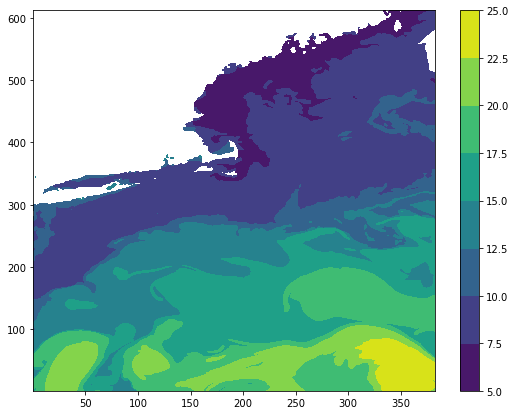

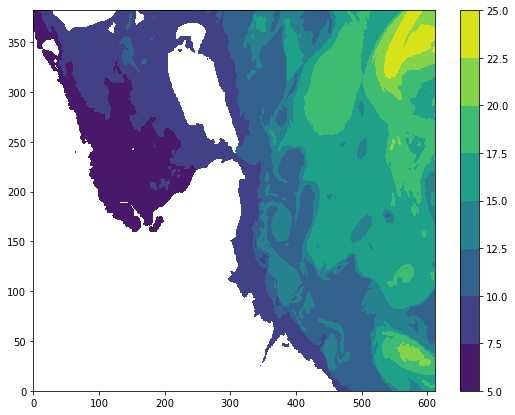

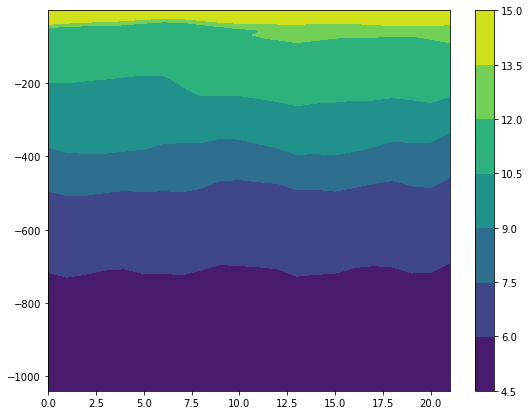

In [6]:
t0=time.time()
ds=xz.Theta.isel(face=fmin,time=slice(0,24),k=slice(0,53),i=slice(imin,imax),j=slice(jmin,jmax))
dsXC=xz.XC.isel(face=fmin,i=slice(imin,imax),j=slice(jmin,jmax))
dsYC=xz.YC.isel(face=fmin,i=slice(imin,imax),j=slice(jmin,jmax))
dxStation=dsXC-lonStation
dyStation=dsYC-latStation
dStation2=dxStation*dxStation+dyStation*dyStation
jStation,iStation=np.unravel_index( np.argmin(dStation2.data), dStation2.data.shape )
myd=ds.data.compute()
elap=time.time()-t0
print(elap)

fig = plt.figure(figsize=(9,7))
plt.contourf(myd[0,0,:,:].T,origin='upper')
plt.colorbar();

fig = plt.figure(figsize=(9,7))
plt.contourf(myd[1,18,:,:])
plt.colorbar();

zvals=xz.Z[0:53].compute()
fig = plt.figure(figsize=(9,7))
plt.contourf(range(0,22),zvals,myd[2:,:,jStation,iStation].T)
plt.colorbar();

586.5999808311462


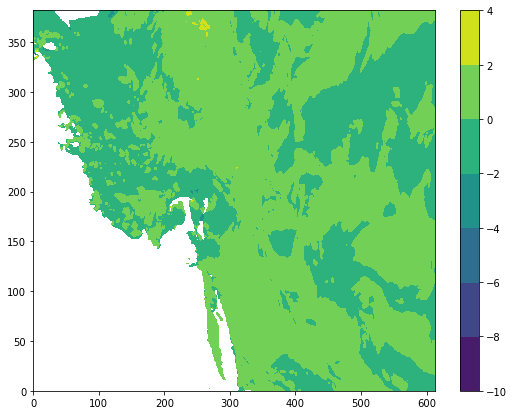

In [7]:
# Now lets get 5 days of hourly fields for the region for all fields and over the full depth 
import time
t0=time.time()
nt=24*5
dsEta=xz.Eta.isel(face=fmin,time=slice(0,nt),i=slice(imin,imax),j=slice(jmin,jmax))
dsSalt=xz.Salt.isel(face=fmin,time=slice(0,nt),k=slice(0,90),i=slice(imin,imax),j=slice(jmin,jmax))
dsT=xz.Theta.isel(face=fmin,time=slice(0,nt),k=slice(0,90),i=slice(imin,imax),j=slice(jmin,jmax))
dsU=xz.U.isel(face=fmin,time=slice(0,nt),k=slice(0,90),i_g=slice(imin,imax+1),j=slice(jmin,jmax))
dsV=xz.V.isel(face=fmin,time=slice(0,nt),k=slice(0,90),i=slice(imin,imax),j_g=slice(jmin,jmax+1))
mydx=xarray.merge([dsT,dsSalt,dsU,dsV])
mydx.load()
elap=time.time()-t0
print(elap)

fig = plt.figure(figsize=(9,7))
plt.contourf(mydx.U.data[23,0,:,:])
plt.colorbar();


1.0692989826202393


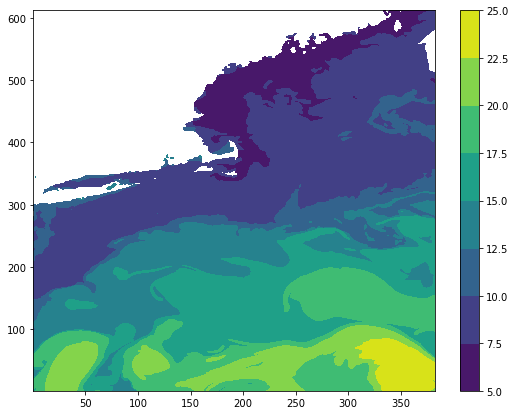

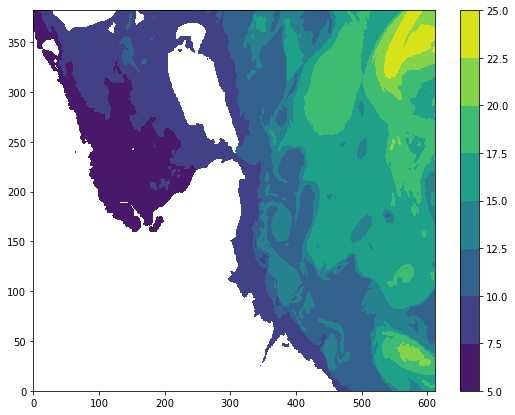

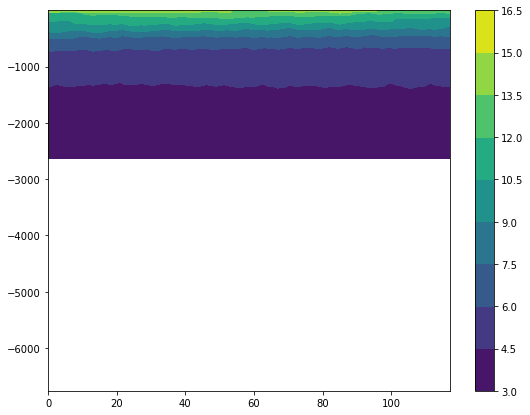

In [8]:
t0=time.time()
mydd=mydx.Theta.data
fig = plt.figure(figsize=(9,7))
plt.contourf(mydd[0,0,:,:].T,origin='upper')
plt.colorbar();

fig = plt.figure(figsize=(9,7))
plt.contourf(mydd[1,18,:,:])
plt.colorbar();

zvals=xz.Z[0:90].compute()
fig = plt.figure(figsize=(9,7))
plt.contourf(range(0,118),zvals,mydd[2:,:,jStation,iStation].T)
plt.colorbar();
elap=time.time()-t0
print(elap)

In [9]:
# Write to zarr chunked in time 
t0=time.time()
cT=4
nk=mydx.Theta.shape[1]
nj=mydx.Theta.shape[2]
ni=mydx.Theta.shape[3]
niU=mydx.U.shape[3]
njV=mydx.V.shape[2]
eT={"Theta":{"chunks":(cT,nk,nj,ni)}}
eS={"Salt":{"chunks":(cT,nk,nj,ni)}}
eU={"U":{"chunks":(cT,nk,nj,niU)}}
eV={"V":{"chunks":(cT,nk,njV,ni)}}
enc=eT | eS | eU | eV
mydx.to_zarr(store="datacube07",mode="w",encoding=enc)
elap=time.time()-t0
print(elap)

elapall=time.time()-t0all
print(elapall)

42.16322326660156
896.1860358715057
